In [18]:
from IPython.display import Image, display
#Image(filename="exponential smoothing.png")

## Applying Adam Algorithm on Sub-gradient Descent for Linear Support Vector Machines

##### *This is an overview of Linear Support Vector Machines based on the lecture notes of Srikumar.V from the University of Utah.*

By using linear Support Vector Machines, we seek to classify discrete outcomes. In this report we shall illustrate with the case of 2-dimensional features, and trinary outputs (classes).

We have the predictor function 
$$
\begin{aligned}
predictor = b + w_1x_1 + w_2x_2 + ... w_nx_n
          = wx + b
\end{aligned}
$$

This function is the prediction function, where $w$ is a vector of weights, $x$ is a vector of the features, and $b$ is a bias term.
We ought to optimise the weight vector $w$ such that the predictor outputs accurately given some vector $x$. We aren't concerned about the value of the predictor output except for its sign, as in Support Vector Machines, we encode outputs as 1 and -1, and we consider the predictor output to be correct when it has the same sign as the true output.

Let's denote the predictor output as $\hat{y}$.
When 

$$\begin{aligned}\hat{y} = b + w_1x_1 + w_2x_2 + ... w_nx_n = wx + b = 0 \end{aligned}$$

The predictor function is a hyperplane that intersects the plane $\hat{y} = 0.$ In the feature space, the hyperplane linearly separates data points of different classes.

We consider the margin function $γ = \min\limits_{x_i, y_i} \frac{y_i(w^Tx_i+b)}{||w||}$, the margin is the distance of the closest point to said hyperplane. We want to maximise the said margin, which is $\max_{w}γ.$ with respect to weights $w$.

This can be written as a learning problem $\min\limits_{w}\frac{1}{2}w^Tw$ such that $∀i, y_i(w^Tx_i+b) \geq 1.$ Which is to say, the sign of the predicted output $\hat{y}$ is the same as the sign of the actual output which we have labelled -1 or 1.

Hence, from hereon we can construct the Support Vector Machine's objective function, which is 
$$\min\limits_{w,b}\frac{1}{2}w^Tw + C\sum_{i}^{}max(0,1-y_i(w^Tx_i+b))$$



$C$ is a hyperparameter that penalises wrong predictions. Since $1-y_i(w^Tx_i+b)$ is a loss (Hinge Loss), if we let $C$ be small, that means we allow for larger margins between the hyperplane and the closest data points outside the margins. But if we let $C$ be large, that means the loss incurs a larger penalty on the objective function we are trying to minimise, which implies the margin will be set smaller. When $y_i$ and $(w^Tx_i+b)$ have different signs, then $1-y_i(w^Tx_i+b)$ is positive, hence the penalty is incurred.

The function

$$
\begin{aligned}
L(w,x,y,b) = max(0,1-y_i(w^Tx_i+b))
\end{aligned}
$$

is also known as the Hinge loss function, for it is shaped like a hinge. However, it is not differentiable at a point. We can think of this point of the loss function as a point with many "sub-gradients", rather than a singular gradient, where a respective sub-gradient is just a vector of slopes of any lines (or higher-dimensional planes) tangent to the loss function at its discontinuous point.

The subgradient function of the a so called soft-margin Support Vector Machine algorithm, at data point $(x_i, y_i)$ is given as 

$$
\begin{aligned}
∇ J^t = \begin{cases} 
      [w_0; b_0] \text{, if max }(0, 1 - y_iw{x_i}) = 0\\
      [w_0; b_0] - C*y_ix_i\text{, otherwise }
\end{cases}
\end{aligned}
$$

where $w_0$ is the current iteration of the weights, and $b_0$ is the current iteration of the bias, in an adaptive gradient descent algorithm.

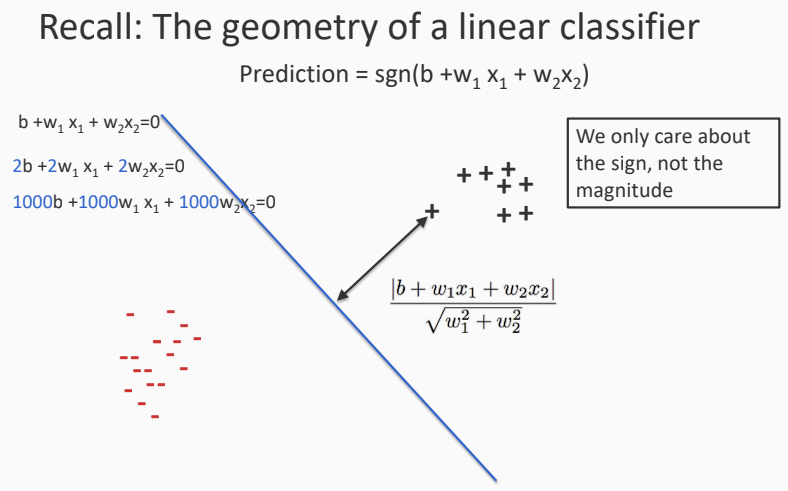

In [19]:
display(Image('svm.png', width=600, height = 600))

Figure x.1: The blue line shows the hyperplane in two-dimensional feature space, the crosses and dashes are differently labeled data.
            The fraction in the figure represents the margin. **(Srikumar, n.d.)**

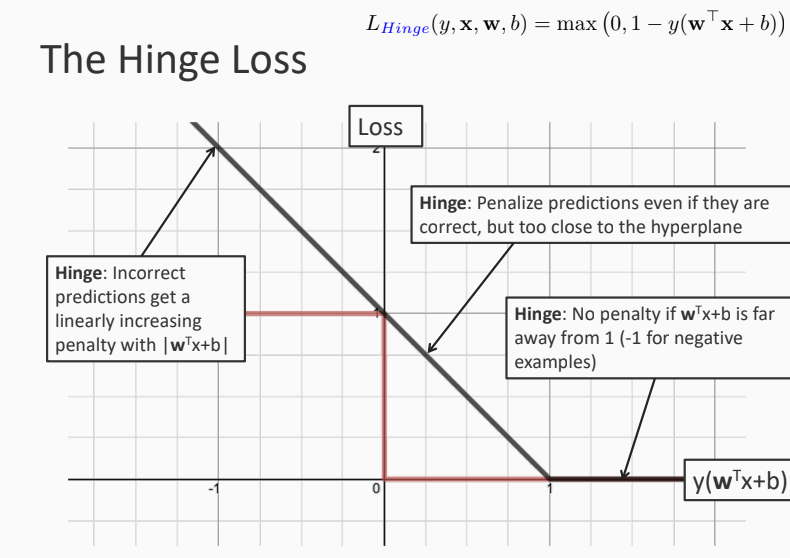

In [20]:
display(Image('hinge.png', width=600, height = 600))

Figure x.2: The Hinge loss function visualised.  **(Srikumar, n.d.)**

## Gradient Descent with Adam

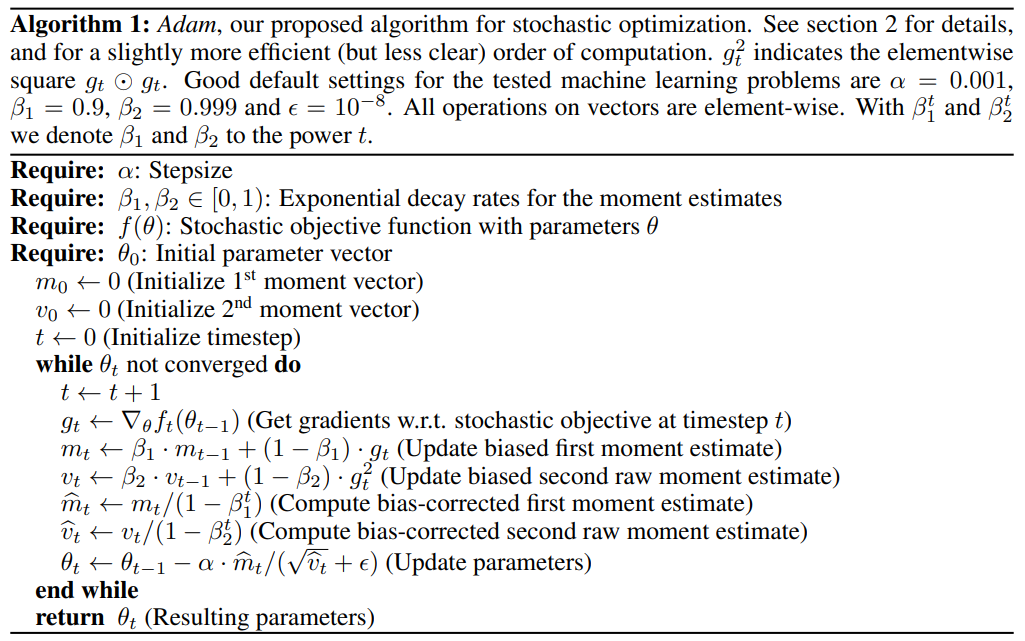

In [21]:
display(Image('adam algo.png', width=600, height = 600))

Figure x.3: The Adam algorithm is described. **(Kingma & Ba, 2017)**

## How Adam Works

##### *The formulae is from Kingma & Ba (2017), but rewritten compactly.*

From the algorithm given above, we see a number of variables and parameters. 

We can actually just write the entire algorithm as a singular function:

$$
\begin{aligned}
\Delta w = -\alpha * \frac{[\beta_{1}\overrightarrow{m_{t-1}}+(1-\beta_1)*\overrightarrow{g_t}(\theta_{t-1})]/(1-\beta_1^t)}
                          {[\sqrt{[\beta_{2}*\overrightarrow{v_{t-1}}+(1-\beta_2)*\overrightarrow{g_t}^{2}(\theta_{t-1})]/(1-\beta_2^t)}]+\epsilon}
\end{aligned}
$$


For the parameters (such as weights and bias) vector $w$, $\Delta w$ is the update to $w$.

We have the exponential decay rates $\beta_1$ and $\beta_2$. The decay rate $\beta_1$ is the exponential smoothing parameter of the exponential moving average of gradients **(Hospodarskyy et. al, 2024)**, $\overrightarrow{m_{t}}$ which we can think of as momentum. $\overrightarrow{m_{t-1}}$ is the exponential moving average of the gradients from previous timesteps of gradient descent, and for the current timestep $t$ the momentum term is 

$$
\begin{aligned}
\overrightarrow{m_{t}} = \beta_{1}\overrightarrow{m_{t-1}}+(1-\beta_1)*\overrightarrow{g_t}(\theta_{t-1})
\end{aligned}
$$

We take the exponential moving average of previous gradients, because if we limit ourselves to updating the relevant parameters by the gradient of the objective function at only a data point on the objective function (or the average gradient of a batch of data points), we could hit a situation where the objective function does not converge to a global minima but a local minima, as in a physical sense the parameter updates might lack the "momentum" to escape a local minima, causing subpar convergence .

Furthermore, it is a smoothed exponential moving average, which is helpful in reducing oscillation of noisy gradients **(Lee et. al, 2021)**.

Similarly, the decay rate $\beta_2$ is the exponential smoothing parameter of the exponential moving average of squared gradients, $\overrightarrow{v_{t}}$. Where for a current time step t it is defined as 

$$
\begin{aligned}
\overrightarrow{v_{t}} = \beta_{2}*\overrightarrow{v_{t-1}}+(1-\beta_2)*\overrightarrow{g_t}^{2}(\theta_{t-1})
\end{aligned}
$$

This is helpful for allowing larger updates for infrequent features and smaller updates for frequent ones **(Wei, 2024)**, as a larger $\overrightarrow{v_{t}}$ means that the exponential moving average of gradient for a certain feature has been historically larger, so by dividing the momentum by a larger averaged squared gradient we are reducing the effect of the momentum on the learning rate for a particular feature. But we can observe the momentum will be larger too, so intuitively speaking they form a balancing act.

Last but not least, $(1-\beta_1^t)$ and $(1-\beta_2^t)$ are bias correctors, as during the initial steps of the algorithm, the moving averages of the gradient and also the squared gradient are much more heavily influenced by earlier gradient values, for which dividing by the bias correctors helps reduce the bias of the moving averages towards earlier gradients **(Simply Beautiful Art, 2021)**.

$\epsilon$ is a small term to avoid division by 0.

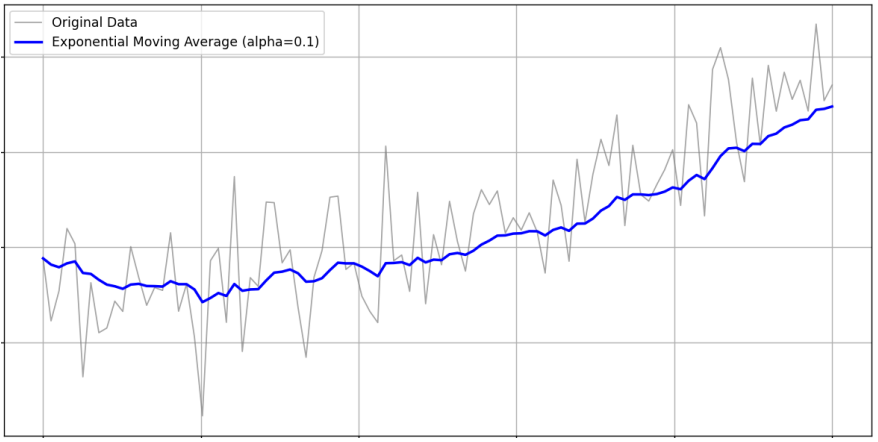

In [22]:
display(Image('smooth.png', width=450, height = 450))

Figure x.4: An exponential moving average curve is smoothed compared to the time series of noisy data. **(Hospodarskyy et. al, 2024)**

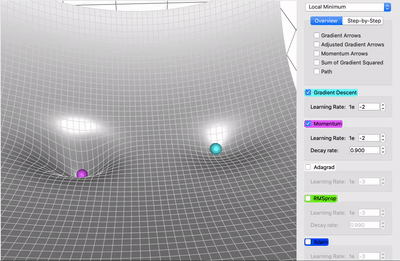

In [23]:
display(Image('momentum.gif', width=450, height = 450))

Figure x.5: Momentum (magenta) vs. Gradient Descent (cyan), the magenta ball could roll out of the local minimum. **(Jiang, 2020)**

## The Adam Algorithm Implementation

An instance of gradient descent over all training data points is called an epoch, while in an epoch, we can split the data points into batches. 

Batches can be sets of data randomly chosen from the whole training data, or they can be sets of data that are uniform splits of the whole training data.

In the application of the Adam Algorithm in this project, for each epoch, we go through random batches of data from batch size equals 1 to the batch being a parameter we set.

Supposedly the predictor function of the linear Support Vector Machine algorithm should be evaluated as 

$$
\begin{aligned}
\hat{y} = \begin{cases} 
b + w_1x_1 + w_2x_2 + ... w_nx_n > 0 ,\text{predicts y = 1} \\
b + w_1x_1 + w_2x_2 + ... w_nx_n < 0 , \text{predicts y = -1}
\end{cases}
\end{aligned}
$$

Unfortunately it is not found why the hyperplane does not separate the differently labeled points at $b + w_1x_1 + w_2x_2 + ... w_nx_n = 0$.

Assuming the hyperplane still linearly separates differently labeled data points, we changed the prediction condition to 

$$
\begin{aligned}
\hat{y} = \begin{cases} 
b + w_1x_1 + w_2x_2 + ... w_nx_n > \text{average }\hat{y} ,\text{predicts y = 1} \\
b + w_1x_1 + w_2x_2 + ... w_nx_n < \text{average }\hat{y} , \text{predicts y = -1}
\end{cases}
\end{aligned}
$$

$$
\begin{aligned}
\text{average } \hat{y} = \frac{\sum_{i=1}^{k}b + w_1x_{i_1} + w_2x_{i_2} + ... w_nx_{i_n}}{k}
\end{aligned}
$$

The reasoning is that if the hyperplane still linearly separates the data, the average $\hat{y}$ should be in between both clusters of data points which we are predicting for, for which we used as an approximate condition. Where $k$ is the number of sample points in the test dataset, and $n$ is the number of features.

After adjusting the condition, we tested the accuracy of the model on the Iris dataset with reduced features, we keep the features petal length and petal width as they show clear linear separation. We also use the One-vs-One strategy to train the dataset as it is a multiclass classification problem.

For each sub-dataset pertaining to two of the three classes (Setosa, Virginica, Versicolor), we randomly sample half of the sub-dataset for training and the other half for testing, by shuffling then splitting in halves.



## Conclusion

For the application of Adam adaptive learning rate algorithm with Support Vector Machines (SVM), the predictions are reasonably well with the tweaked conditions, although without any formal proof for justification for the tweaked conditions. If there is any error, it is assumed not to be due to the Adam algorithm as a simple stochastic gradient descent too didn't work for the supposed condition where the hyperplane separates differently labeled data when its function is equal to 0.

While we have found applications of stochastic sub-gradient descent and standard sub-gradient descent with SVM on the internet, we did not find any applications of Adam with it, but we have extrapolated that given standard and stochastic sub-gradient descent works, Adam could work too. 

## Appendix

An instance of gradient descent over all training data points is called an epoch, while in an epoch, we can split the data points into batches. 

Batches can be sets of data randomly chosen from the whole training data, or they can be sets of data that are uniform splits of the whole training data.

In the application of the Adam Algorithm in this project, for each epoch, we go through random batches of data from batch size equals 1 to the batch being a parameter we set, but bounded by the size of the training data.

Supposedly the predictor function of the linear Support Vector Machine algorithm should be evaluated as 

$$
\begin{aligned}
\hat{y} = \begin{cases} 
b + w_1x_1 + w_2x_2 + ... w_nx_n > 0 ,\text{predicts y = 1} \\
b + w_1x_1 + w_2x_2 + ... w_nx_n < 0 , \text{predicts y = -1}
\end{cases}
\end{aligned}
$$

Unfortunately it is not found why the hyperplane does not separate the differently labeled points at $b + w_1x_1 + w_2x_2 + ... w_nx_n = 0$.

Assuming the hyperplane still linearly separates differently labeled data points, we changed the prediction condition to 

$$
\begin{aligned}
\hat{y} = \begin{cases} 
b + w_1x_1 + w_2x_2 + ... w_nx_n > \text{average }\hat{y} ,\text{predicts y = 1} \\
b + w_1x_1 + w_2x_2 + ... w_nx_n < \text{average }\hat{y} , \text{predicts y = -1}
\end{cases}
\end{aligned}
$$

$$
\begin{aligned}
\text{average } \hat{y} = \frac{\sum_{i=1}^{k}b + w_1x_{i_1} + w_2x_{i_2} + ... w_nx_{i_n}}{k}
\end{aligned}
$$

The reasoning is that if the hyperplane still linearly separates the data, the average $\hat{y}$ should be in between both clusters of data points we are predicting for, for which we used as an approximate condition. Where $k$ is the number of sample points in the test dataset, and $n$ is the number of features.

After adjusting the condition, we tested the accuracy of the model on the Iris dataset with reduced features, we keep the features petal length and petal width as they show clear linear separation. We also use the One-vs-One strategy to train the dataset as it is a multiclass classification problem.

For each sub-dataset pertaining to two of the three classes (Setosa, Virginica, Versicolor), we randomly sample half of the sub-dataset for training and the other half for testing, by shuffling then splitting in halves.

The accuracy scores are reasonably high, with in so far a minimum of 85% between the least linearly separable labels which are Versicolor and Virginica. That is to say, the weights we have trained using Adam and the sub-gradient function classifies the test data pretty well.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import pandas as pd

In [25]:
df = pd.read_csv("iris.csv")

In [26]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [27]:
df = pd.read_csv("iris.csv")

df = df.drop(['sepal.length', 'sepal.width'], axis=1)
#by dropping these features we are able to get mostly linearly separable data

df1 = df.drop(df[df['variety'] == 'Setosa'].index) #delete data labelled Setosa
df2 = df.drop(df[df['variety'] == 'Versicolor'].index) #delete data labelled Versicolor
df3 = df.drop(df[df['variety'] == 'Virginica'].index) #delete data labelled Virginica

# Map the class values to 1 and -1
df1['variety'] = df1['variety'].map({'Versicolor': 1, 'Virginica': -1})
df2['variety'] = df2['variety'].map({'Setosa': 1, 'Virginica': -1})
df3['variety'] = df3['variety'].map({'Setosa': 1, 'Versicolor': -1})

#half of the data for training, the other half for testing

#data shuffling, splitting
df3 = df3.sample(frac=1).reset_index(drop=True)
df3Train = df3[:50]
df3Test = df3[51:]

#data shuffling, splitting
df2 = df2.sample(frac=1).reset_index(drop=True)
df2Train = df2[:50]
df2Test = df2[51:]

#data shuffling, splitting
df1 = df1.sample(frac=1).reset_index(drop=True)
df1Train = df1[:50]
df1Test = df1[51:]

In [28]:
# define svm with adam
# some more functions
##############weights, epochs, batch size, dataframe, the hyperparameter C
def svmadam(weight, iterations, batchsize, dataframe, hyperparameterC):
    
    DF = dataframe #internalised dataframe within the function to make changes to it
    
    rate = 0.000001 #apply adam optimiser later (now constant learning rate)
    
    w = weight
    
    #initialisations
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 0.00000001 #avoid division by zero
    bias = [1]
    
    #initialise moments
    firstmomentvector = np.array([0,0,0]) #last moment corresponds to bias
    secondmomentvector = np.array([0,0,0]) #last moment corresponds to bias
    biasCorrected1stMoment = np.array([0,0,0])
    biasCorrected2ndMoment = np.array([0,0,0])
    
    #################################################################################################################  
    for E in range(iterations): #loop through epochs
        
        batch = DF.sample(n=batchsize)#len(DF)) #random samples from the dataframe
    
        gradientsum = 0 #sum the gradient computed from each sample point in the batch
        
        #################################################################################################################
        #drop samples in batches that do not meet condition y_i<w_t, x_i>  <  1
        
        for j in range(batchsize):
            #loop over the random batch
            for i in range(j):

                #Since Pandas data is stored internally as Numpy arrays, you can extract the Numpy representation directly.
                xANDy = batch.iloc[i].to_numpy() #extract the current sample (row) from the batch as numpy array

                x = xANDy[np.arange(xANDy.size - 1)] #remove last element from the current sample to get x

                x = np.append(bias,x) #append 1 as first element of x (for bias)

                y = xANDy[-1] #last element from the current sample in batch, is y

                #calculate gradient
                if max(0, 1 - y*(np.dot(w.T, x))) == 0: 
                    gradient = w.T
                else:
                    gradient = (w.T - (hyperparameterC*y*x).T)
                    
                gradientsum = gradientsum + gradient
            #################################################################################################################
        
        #calculate mean gradient of the batch
        meanbatchgradient = gradientsum/batchsize
        
        #################################################################################################################
        
        #ADAM
        
        firstmomentvector = (beta1*firstmomentvector)+(1-beta1)*meanbatchgradient
        
        secondmomentvector = (beta2*secondmomentvector)+(1-beta2)*(meanbatchgradient**2)
        
        biasCorrected1stMoment = firstmomentvector/(1-beta1**(E+1))#E cannot start with 0 otherwise we have division by zero
                                                                   #so suppose we start at timestep t = 1
        
        biasCorrected2ndMoment = secondmomentvector/(1-beta2**(E+1))
        
        #w = w - rate*gradientsum #update weights
        
        w = w - (rate)*(biasCorrected1stMoment/((biasCorrected2ndMoment**0.5)+epsilon))
        #w = w - rate*meanbatchgradient
        #print(w)
        
    #################################################################################################################
       
    #return optimal weights we shall use in to create the svm classifier hyperplane    
    return w

In [29]:
#use for prediction

#weights = np.array(w[np.arange(w.size - 1)]) #remove last element of weights as it is bias

#bias = w[-1] #last element of w is bias

def testingfunction(testdataframe, weights):
    
    correctpredictions = 0
    
    totalpredictions = len(testdataframe.index)

    bias = [1]

    lsvmmean = 0

    ##############################################################################################################

    for r in range(len(testdataframe.index)):

            xANDy = testdataframe.iloc[r].to_numpy() #extract the current sample from the dataframe

            x = np.append(bias, np.array(xANDy[np.arange(xANDy.size - 1)])) #remove first element from the current sample to get x, append 1 for bias

            y = xANDy[-1] #get last element of current sample which is y

            lsvmmean = lsvmmean + np.dot(weights.T, x)

    lsvmmean = lsvmmean/len(df3Test.index)

    #print(lsvmmean)

    ##############################################################################################################

    for i in range(len(testdataframe.index)):
        xANDy = testdataframe.iloc[i].to_numpy() #extract the current sample from the dataframe

        x = np.append(bias, np.array(xANDy[np.arange(xANDy.size - 1)])) #remove first element from the current sample to get x, append 1 for bias

        y = xANDy[-1] #get last element of current sample which is y

        linearsvm = np.dot(weights.T, x)
        
        # i am not sure how did i not get the demarcation line y = wx + bias to be = 0,
        # but supposedly the demarcation line y = wx + bias still linearly separates the data
        # where w are the weights we have trained using gradient descent with adam
        # hence I changed the prediction function condition to be larger or smaller than the average y = wx + bias
        # where x are features from the test data, and w are the trained weights
        # instead of larger or smaller than 0
        # somehow it works, thus this should imply the weights do linearly separate the data

        if linearsvm > lsvmmean:
            yhat = 1
        elif linearsvm < lsvmmean:
            yhat = -1
        else:
            yhat = 0
        
        if np.array(yhat) == y:
            correctpredictions = correctpredictions + 1
        
        

        #print ("Predicted y is " + str(yhat) + ", Actual y is " + str(y))
        
    print ("accuracy is " + str((correctpredictions/totalpredictions)*100))
    

In [30]:
# Set initial parameters
epochs = 100
c = 1
w = np.array([0,0,0]) #last weight corresponds to bias

w = svmadam(w, epochs, 30, df2Train, c)
testingfunction(df2Test, w) #setosa and virginica

accuracy is 100.0


In [31]:
w = svmadam(np.array([0,0,0]), 100, 20, df1Train, 1)
testingfunction(df1Test, w) #versicolor and virginica

#for this case, as the shuffling of data differs so does the accuracy

accuracy is 95.91836734693877


In [32]:
w = svmadam(np.array([0,0,0]), 100, 30, df3Train, 1)
testingfunction(df3Test, w) #setosa and versicolor

accuracy is 100.0


In [33]:
# import packages 
import seaborn as sns

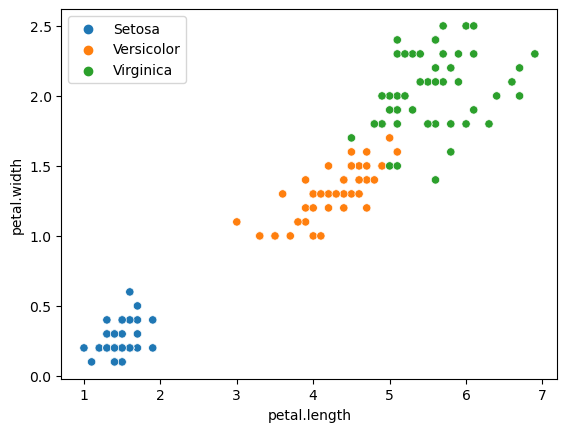

In [34]:
# to visualise the linear separability of the data
x1 = 'petal.length'
x2 = 'petal.width'

def scatter2d(x1,x2):
    sns.scatterplot(x=x1, y=x2, hue='variety', data=df)
    plt.legend()
    plt.show()

scatter2d(x1,x2)

Figure x.6: visualisation of the data.

## References

1. Srikumar, V. (n.d.) 'Support Vector Machines' [Lecture Slides], *Machine Learning*. The University of Utah. https://users.cs.utah.edu/~zhe/pdf/lec-19-svm-intro-upload.pdf
2. Srikumar, V. (n.d.) 'Support Vector Machines: Training with Stochastic Gradient Descent' [Lecture Slides], *Machine Learning*. The University of Utah. https://users.cs.utah.edu/~zhe/pdf/lec-19-2-svm-sgd-upload.pdf
3. Kingma, D. P., & Ba, J. (2017). Adam: A method for stochastic optimization (No. arXiv:1412.6980). arXiv. http://arxiv.org/abs/1412.6980
4. Hospodarskyy, O., Martsenyuk, V., Kukharska, N., Hospodarskyy, A., Svertstiuk, S. (2024). Understanding the Adam Optimization Algorithm in
Machine Learning. CEUR Workshop Proceedings. https://ceur-ws.org/Vol-3742/paper17.pdf
5. Lee, T., Gasswint, G., Henning, E. (2021). Momentum. Cornell University Computational Optimization Open Textbook. https://optimization.cbe.cornell.edu/index.php?title=Momentum
6. Wei, D. (2024). Demystifying the Adam Optimizer in Machine Learning. Medium.com. https://medium.com/@weidagang/demystifying-the-adam-optimizer-in-machine-learning-4401d162cb9e
7. Simply Beautiful Art. Answer to "Why is it important to include a bias correction term for the Adam optimizer for Deep Learning?", Stats Stack Exchange. 14 April, 2021. https://stats.stackexchange.com/questions/232741/why-is-it-important-to-include-a-bias-correction-term-for-the-adam-optimizer-for (Licensed under CC BY-SA 3.0: <https://creativecommons.org/licenses/by-sa/3.0/>)
8. Jiang, L. (2020). A Visual Explanation of Gradient Descent Methods (Momentum, AdaGrad, RMSProp, Adam). Medium.com. https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c